# Q-Table Learning

In [44]:
import gym
import numpy as np
import random 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## Load the enviroment

In [45]:
env = gym.make('FrozenLake-v0')

In [46]:
# # Demo how to update a table
# # Initialize table with all zeros
# Q = np.zeros([env.observation_space.n,env.action_space.n])

# # Set learning parameters
# lr = .8
# y = .95
# num_episodes = 2000
# # Create lists to contain total rewards and steps per episode 
# # jList = []
# rList = [] 
# for i in range(num_episodes):
#     #Reset environment and get first new observation
#     s = env.reset()
#     rAll = 0
#     j = 0 
#     # The Q-Table learning algorithm
#     while j < 99:
#         j+=1 
#         # Choose an action by greedily (with noise) picking from Q table
#         a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        
#         # Get new state and reward from enviroment 
#         s1,r,d,_ = env.step(a)
        
#         # Update Q-Table with new knowledge
#         Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
#         rAll += r
#         s = s1
#         if d == True:
#             break
#         #jList.append(j)
#         rList.append(rAll)

# The Q-Network Approach
## Implementing the network itself

In [47]:
# Clears the default graph stack and resets the global default graph
tf.reset_default_graph()

In [48]:
# The following establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16], dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout, 1)

# Below we obtain the loss by taking the sum of squares different between the target and prediction Q values
nextQ = tf.placeholder(shape = [1,4], dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

## Training the network

In [50]:
init = tf.global_variables_initializer()

# Set learning parameters
y = .99
e = 0.1 
num_epo = 2000
# create lists to contain total rewards and steps per episode 
jList = []
rList = []

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epo):
        # Reset environment and get first new observation
        s = env.reset()
        rAll = 0 
        d = False
        j = 0
        # The Q-Network
        while j < 99:
            j += 1
            # Choose an action by greedily (with e change of radom action) from the Q-network
            a,allQ = sess.run([predict,Qout], feed_dict={inputs1:np.identity(16)[s:s+1]})
            if np.random.rand(1) < e:
                a[0] = env.action_space.sample()
            # Get new state and reward from environment
            s1,r,d,_ = env.step(a[0])
            # Obtain the Q 'values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict = {inputs1:np.identity(16)[s1:s1+1]})
            # Obtain maxQ' and set our target value for chosen action 
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a[0]] = r + y*maxQ1
            # Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1], nextQ:targetQ})
            rAll += r
            s = s1
                
            if d == True:
                # Reduce chance of random action as we train the model 
                e = 1./((i/50) + 10)
                break
                
        jList.append(j)
        rList.append(rAll)
print("Percent of succesful episodes: " + str(sum(rList)/num_epo) + "%")

Percent of succesful episodes: 0.0%


## Sime Statistics on network performance

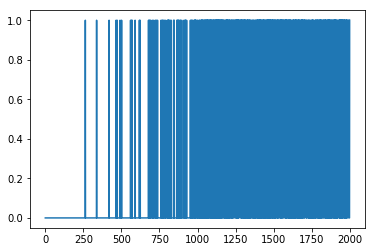

In [39]:
plt.plot(rList)

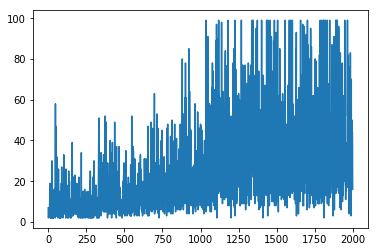

In [40]:
plt.plot(jList)

In [41]:
env.step(a[0])

(15, 0, True, {'prob': 1.0})

In [43]:
targetQ

array([[ 0.57450193,  1.00611877,  0.72822636,  0.68534023]], dtype=float32)